In [137]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random

%matplotlib inline

In [152]:
# filename = "images/misaligned_images/test.jpg"
filenames = glob.glob('images/misaligned_images/*')
# filename = "images/misaligned_images/0e27f636242845138158f132878a3351.jpg"
filename = random.choice(filenames)
print(filename)

images/misaligned_images/billing-invoice-for-legal-services.jpg


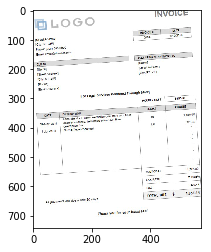

In [153]:
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

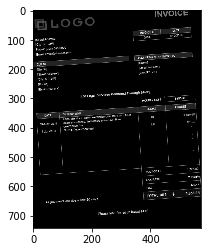

In [154]:
# convert the image to grayscale and flip the foreground
# and background to ensure foreground is now "white" and
# the background is "black"
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.bitwise_not(gray)
plt.imshow(gray, 'gray')

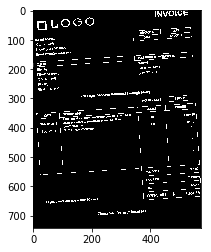

In [155]:
# binarize
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, 'gray')

In [156]:
# test pixel values
pixels = thresh.shape[0] * thresh.shape[1]
whites = (thresh>0).sum()
thresh.shape, whites/pixels

((742, 573), 0.05281466533071789)

-86.31558990478516


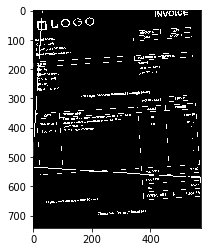

In [163]:
# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(thresh > 0))
rect = cv2.minAreaRect(coords)

# draw rectangle
box = cv2.boxPoints(rect)
box = np.int0(box)
image_rect = thresh.copy()
cv2.drawContours(image_rect, [box],0, (255, 255, 255),2 )
plt.imshow(image_rect, 'gray')


angle = rect[-1]
print(angle)

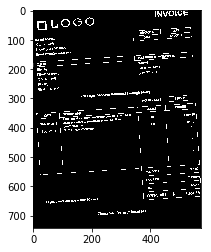

In [164]:
plt.imshow(thresh, 'gray')

In [165]:
if angle < -45:
	angle = -(90 + angle)
else:
	angle = -angle

In [166]:
angle

-3.6844100952148438

In [167]:
# rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

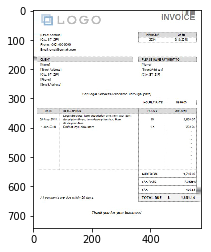

In [168]:
plt.imshow(rotated)